In [1]:
import urllib
import os
import shutil

url = 'https://api.tidesandcurrents.noaa.gov/api/prod/datagetter?product=water_level&application=NOS.COOPS.TAC.WL&begin_date=20220901&end_date=20221001&datum=MLLW&station=8413320&time_zone=GMT&units=metric&format=csv'

headers_1 = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36'}
output_path = "/Users/kboothomefolder/phy577_projects/hw2/data/CO-OPS__8413320__wl.csv"

# request the file from website
req = urllib.request.Request(url, headers=headers_1)

# open it in a file and write it to save it in local
with urllib.request.urlopen(req) as response, open(output_path, 'wb') as f:
    shutil.copyfileobj(response, f)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylib import *
from datetime import datetime
import matplotlib.dates as mdates
from scipy.stats import skew
from matplotlib.offsetbox import AnchoredText


# Bar Harbor, ME - Station ID: 8413320
# metric, GMT, MSL, csv

file_loc = '/Users/kboothomefolder/phy577_projects/hw2/data/CO-OPS__8413320__wl.csv'
sta = pd.read_csv(file_loc)
sta = pd.DataFrame(sta.iloc[:, :-5])

################# Create array variables ##########################

# Convert "Date Time" column to numpy datetime64 array
time = np.array(pd.to_datetime(sta['Date Time']))
MSL = np.asarray(pd.to_numeric(sta.iloc[:,1]))
Sigma = np.asarray(pd.to_numeric(sta.iloc[:,2]))

# Calculate the uncertainty of each 6-min value using sigma, and the standard error of the mean eq (SEM)
sta['SEM'] = np.round(Sigma/sqrt(6), 3) # 6 is the number of measurements per MSL obs
SEM = np.asarray(pd.to_numeric(sta.iloc[:,3]))

In [3]:
# Check variable types and NaNs

'''
print(type(time[0])) # type datetime64
print(type(MSL[0])) # type float64
print(type(Sigma[0])) # type float64


# Data obs v NaN calculations

#How many obervations? Same for each category due to timeframe
obs = len(MSL) # 38,938 obs
      
#Determine how many observations are not Nan
nan = np.asarray(len(MSL[np.isnan(MSL)]))

valid_obs = (obs - nan)/obs * 100 # 100% legit values

print(valid_obs) 
'''

'\nprint(type(time[0])) # type datetime64\nprint(type(MSL[0])) # type float64\nprint(type(Sigma[0])) # type float64\n\n\n# Data obs v NaN calculations\n\n#How many obervations? Same for each category due to timeframe\nobs = len(MSL) # 38,938 obs\n      \n#Determine how many observations are not Nan\nnan = np.asarray(len(MSL[np.isnan(MSL)]))\n\nvalid_obs = (obs - nan)/obs * 100 # 100% legit values\n\nprint(valid_obs) \n'

In [4]:
######################## Calculate Statistics ##########################

MSL_mean = round(np.mean(MSL), 3) # sample mean
MSL_stdev = round(np.std(MSL),2) # standard deviation
MSL_skew = round(skew(MSL),3) # skewness

print("Stat Calcs MSL")
print("MSL Mean:", MSL_mean)
print("MSL SD:", MSL_stdev)
print("MSL Skew:", MSL_skew)

####################### Tidal Constituents ##############################

# Lunar Constituent (M2): 
    
M2_hours = 12
M2_minutes = 25
M2_hours = round(((M2_hours + M2_minutes / 60) ), 3)
M2_days = round(((M2_hours + M2_minutes / 60) / 24), 3)

# Solar Constituent (S2):

S2_hours = 12
S2_days = S2_hours / 24

print("Principal Tidal Constituent Periods:")
print("M2 Period:", M2_days, "days")
print("M2 Period:", M2_hours, "hours")
print("S2 Period:", S2_days, "days")

Stat Calcs MSL
MSL Mean: 1.868
MSL SD: 1.14
MSL Skew: 0.011
Principal Tidal Constituent Periods:
M2 Period: 0.535 days
M2 Period: 12.417 hours
S2 Period: 0.5 days


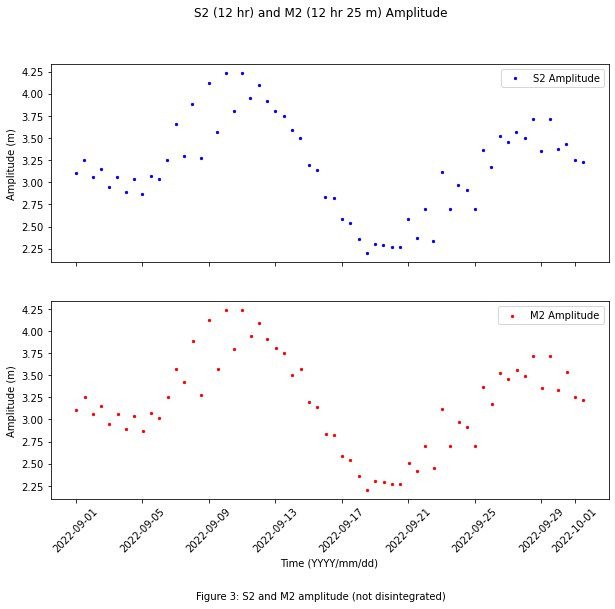

In [5]:
############################# S2 Amplitude ######################################################3

max_vals = []
min_vals = []
int_time = []

int_start = time[0]
int_end = int_start + pd.DateOffset(hours=12)

for i in range(len(time)):
    if time[i] <= int_end:
        
        if not max_vals:
            max_vals.append(MSL[i])
            min_vals.append(MSL[i])
            int_time.append(int_start)
        else:
            max_val = max(max_vals[-1], MSL[i]) if max_vals else MSL[i]
            min_val = min(min_vals[-1], MSL[i]) if min_vals else MSL[i]
            max_vals[-1] = max_val
            min_vals[-1] = min_val

    else:
        # Move to the next 12-hour interval
        int_start = int_end
        int_end = int_start + pd.DateOffset(hours=12)
        
        max_vals.append(MSL[i])
        min_vals.append(MSL[i])
        int_time.append(int_start)
        
# Calculate the MSL amplitude for each 12-hour interval
amp_S2 = [max_val - min_val for max_val, min_val in zip(max_vals, min_vals)]

# Create a DataFrame to store the results
amp_S2 = pd.DataFrame({'Interval Start': pd.to_datetime(int_time), 'Amplitude': amp_S2})


############################# M2 values ######################################################3

max_vals = []
min_vals = []
int_time = []

int_start = time[0]
int_end = int_start + pd.DateOffset(hours=12.417)

for i in range(len(time)):
    if time[i] <= int_end:
        
        if not max_vals:
            max_vals.append(MSL[i])
            min_vals.append(MSL[i])
            int_time.append(int_start)
        else:
            max_val = max(max_vals[-1], MSL[i]) if max_vals else MSL[i]
            min_val = min(min_vals[-1], MSL[i]) if min_vals else MSL[i]
            max_vals[-1] = max_val
            min_vals[-1] = min_val

    else:
        # Move to the next 12-hour interval
        int_start = int_end
        int_end = int_start + pd.DateOffset(hours=12)
        
        max_vals.append(MSL[i])
        min_vals.append(MSL[i])
        int_time.append(int_start)
        
# Calculate the MSL amplitude for each 12-hour interval
amp_M2 = [max_val - min_val for max_val, min_val in zip(max_vals, min_vals)]

# Create a DataFrame to store the results
amp_M2 = pd.DataFrame({'Interval Start': pd.to_datetime(int_time), 'Amplitude': amp_M2})

############################# Amp values figure ######################################################3

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot MSL 
ax1.scatter(amp_S2['Interval Start'], amp_S2['Amplitude'], color='blue', label='S2 Amplitude', s=5)
ax1.set_ylabel('Amplitude (m)')
ax1.tick_params(axis='x', rotation=45)

ax1.legend()

ax2.scatter(amp_M2['Interval Start'], amp_M2['Amplitude'], color='red', label='M2 Amplitude', s=5)
ax2.set_xlabel('Time (YYYY/mm/dd)')
ax2.tick_params(axis='x', rotation=45)
ax2.set_ylabel('Amplitude (m)')
ax2.legend()
plt.suptitle('S2 (12 hr) and M2 (12 hr 25 m) Amplitude')

# Add a figure caption below the x-axis label
caption = 'Figure 3: S2 and M2 amplitude (not disintegrated)'
plt.figtext(0.5, -0.05, caption, ha='center', fontsize=10)

# Save the figures
output_dir = '/Users/kboothomefolder/phy577_projects/hw2/figures'
savefig(os.path.join(output_dir, 'MSL_BHME_Amplitude.png'))

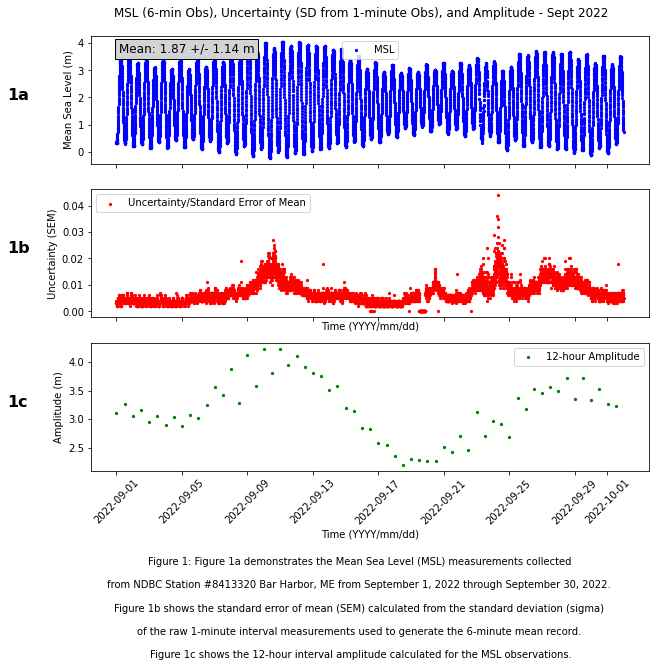

In [6]:
######################### Plot Data ######################################

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

# Plot MSL 
ax1.scatter(time, MSL, color='blue', label='MSL', s=5)
ax1.set_ylabel('Mean Sea Level (m)')
ax1.tick_params(axis='x', rotation=45)
text_box = f"Mean: {MSL_mean:.2f} +/- {MSL_stdev:.2f} m"
ax1.text(0.05, 0.95, text_box, transform=ax1.transAxes, fontsize=12, verticalalignment='top', bbox=dict(boxstyle='square', facecolor='lightgray'))
ax1.legend()

ax2.scatter(time, SEM, color='red', label='Uncertainty/Standard Error of Mean', s=5)
ax2.set_xlabel('Time (YYYY/mm/dd)')
ax2.tick_params(axis='x', rotation=45)
ax2.set_ylabel('Uncertainty (SEM)')
ax2.legend()

ax3.scatter(amp_M2['Interval Start'], amp_M2['Amplitude'], color='green', label='12-hour Amplitude', s=5)
ax3.set_xlabel('Time (YYYY/mm/dd)')
ax3.tick_params(axis='x', rotation=45)
ax3.set_ylabel('Amplitude (m)')
ax3.legend()

# Add figure labels
ax1.text(-0.15, 0.5, '1a', transform=ax1.transAxes, fontsize=16, fontweight='bold')
ax2.text(-0.15, 0.5, '1b', transform=ax2.transAxes, fontsize=16, fontweight='bold')
ax3.text(-0.15, 0.5, '1c', transform=ax3.transAxes, fontsize=16, fontweight='bold')

# Add a figure caption below the x-axis label
#caption = 'Figure 1: Figure 1a demonstrates the Mean Sea Level (MSL) measurements collected from NDBC Station #8413320 Bar Harbor, ME from September 1, 2022 through September 30, 2022. Figure 1b shows the standard error of mean (SEM) calculated from the standard deviation (sigma) of the raw 1-minute interval measurements used to generate the 6-minute mean record. Figure 1c shows the 12-hour interval amplitude calculated for the MSL observations.'

caption = (
    'Figure 1: Figure 1a demonstrates the Mean Sea Level (MSL) measurements collected \n\n' 
    'from NDBC Station #8413320 Bar Harbor, ME from September 1, 2022 through September 30, 2022. \n\n'
    'Figure 1b shows the standard error of mean (SEM) calculated from the standard deviation (sigma) \n\n' 
    'of the raw 1-minute interval measurements used to generate the 6-minute mean record. \n\n'
    'Figure 1c shows the 12-hour interval amplitude calculated for the MSL observations.'
)

plt.figtext(0.5, -0.2, caption, ha='center', fontsize=10)

plt.suptitle('MSL (6-min Obs), Uncertainty (SD from 1-minute Obs), and Amplitude - Sept 2022', y = 0.93)


output_dir = '/Users/kboothomefolder/phy577_projects/hw2/figures'
#plt.savefig(os.path.join(output_dir, 'MSL_BHME.png'))
output_path = os.path.join(output_dir, 'MSL_BHME.png')
plt.savefig(output_path, format='png', bbox_inches='tight', dpi = 1000)



[4800 4801 4802 ... 6238 6239 6240]
Stat Calcs MSL 9/21 - 9/27
MSL Mean: 1.868
MSL SD: 1.02
MSL Skew: 0.012


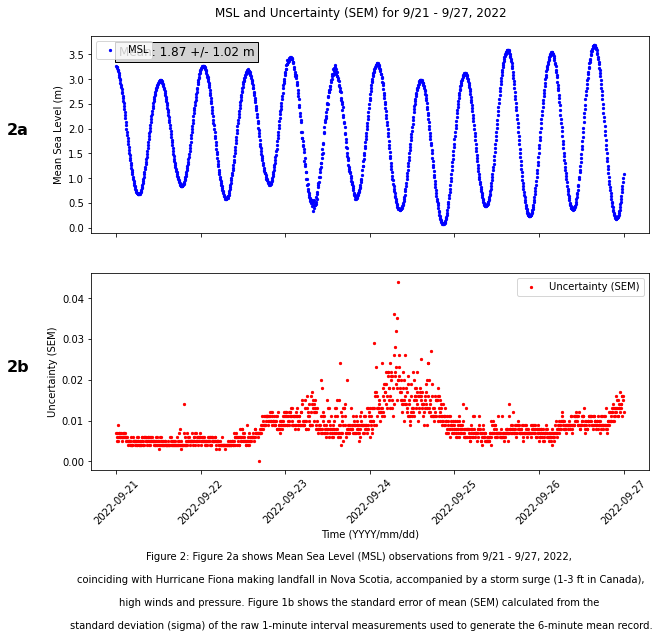

In [7]:
# Find week series with anomaly 9/21 - 9/27

# Define the start and end dates for the selected range
start = pd.to_datetime('2022-09-21')
end = pd.to_datetime('2022-09-27')

ind = np.where((time >= start) & (time <= end))[0]

# Find the indices where the datetime objects are within the desired range
ind = np.where((time >= start) & (time <= end))[0]

print(ind)

###### Calculate mean and std for this period #############

week_mean = round(np.mean(MSL[4800:6241]), 3) # sample mean
week_stdev = round(np.std(MSL[4800:6241]),2) # standard deviation
week_skew = round(skew(MSL[4800:6241]),3) # skewness

print("Stat Calcs MSL 9/21 - 9/27")
print("MSL Mean:", week_mean)
print("MSL SD:", week_stdev)
print("MSL Skew:", week_skew)


######################### Zoom Plot Data ######################################

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot MSL 
ax1.scatter(time[4800:6241], MSL[4800:6241], color='blue', label='MSL', s=5)
ax1.set_ylabel('Mean Sea Level (m)')
ax1.tick_params(axis='x', rotation=45)
text_box = f"Mean: {week_mean:.2f} +/- {week_stdev:.2f} m"
ax1.text(0.05, 0.95, text_box, transform=ax1.transAxes, fontsize=12, verticalalignment='top', bbox=dict(boxstyle='square', facecolor='lightgray'))

ax1.legend()

ax2.scatter(time[4800:6241], SEM[4800:6241], color='red', label='Uncertainty (SEM)', s=5)
ax2.set_xlabel('Time (YYYY/mm/dd)')
ax2.tick_params(axis='x', rotation=45)
ax2.set_ylabel('Uncertainty (SEM)')
ax2.legend()

plt.suptitle('MSL and Uncertainty (SEM) for 9/21 - 9/27, 2022', y = 0.93)

ax1.text(-0.15, 0.5, '2a', transform=ax1.transAxes, fontsize=16, fontweight='bold')
ax2.text(-0.15, 0.5, '2b', transform=ax2.transAxes, fontsize=16, fontweight='bold')

# Add a figure caption below the x-axis label
caption = ('Figure 2: Figure 2a shows Mean Sea Level (MSL) observations from 9/21 - 9/27, 2022, \n\n'
'coinciding with Hurricane Fiona making landfall in Nova Scotia, accompanied by a storm surge (1-3 ft in Canada),\n\n' 
'high winds and pressure. Figure 1b shows the standard error of mean (SEM) calculated from the \n\n' 
'standard deviation (sigma) of the raw 1-minute interval measurements used to generate the 6-minute mean record.')

plt.figtext(0.5, -0.15, caption, ha='center', fontsize=10)

# Save the figures
output_dir = '/Users/kboothomefolder/phy577_projects/hw2/figures'

output_path = os.path.join(output_dir, 'MSL_BHME_Anomaly.png')
plt.savefig(output_path, format='png', bbox_inches='tight', dpi = 1000)

In [8]:
######################### Tidal Amplitude? ######################################
'''
from scipy.signal import find_peaks
from scipy.signal import argrelextrema
from scipy.signal import detrend
from scipy.signal import hilbert
from scipy.fft import fft
import datetime as dt
from scipy import stats
from scipy import signal

# Perform tidal analysis (harmonic analysis) on the MSL data.
# You can use a library like Pytides or Tappy for this purpose.
# Here's an example using Pytides:

from pytides.tide import Tide

# Create a Tide object with your MSL data
tide = Tide.decompose(MSL.values, time.values)

# Extract the amplitude of the M2 tidal component (semi-diurnal tide)
M2_amp = tide['M2'].amplitude

# Calculate tidal amplitude in meters
#tidal_amplitude_meters = 2 * M2_amplitude  # Multiply by 2 to get full tidal range

# Print the tidal amplitude
print(f'Tidal Amplitude (M2): {tidal_amplitude_meters} meters')
'''

"\nfrom scipy.signal import find_peaks\nfrom scipy.signal import argrelextrema\nfrom scipy.signal import detrend\nfrom scipy.signal import hilbert\nfrom scipy.fft import fft\nimport datetime as dt\nfrom scipy import stats\nfrom scipy import signal\n\n# Perform tidal analysis (harmonic analysis) on the MSL data.\n# You can use a library like Pytides or Tappy for this purpose.\n# Here's an example using Pytides:\n\nfrom pytides.tide import Tide\n\n# Create a Tide object with your MSL data\ntide = Tide.decompose(MSL.values, time.values)\n\n# Extract the amplitude of the M2 tidal component (semi-diurnal tide)\nM2_amp = tide['M2'].amplitude\n\n# Calculate tidal amplitude in meters\n#tidal_amplitude_meters = 2 * M2_amplitude  # Multiply by 2 to get full tidal range\n\n# Print the tidal amplitude\nprint(f'Tidal Amplitude (M2): {tidal_amplitude_meters} meters')\n"